#Projeto Prático - Etapa 1
Visualização Computacional - SCC0252<br>
Profa. Maria Cristina<br>

##Grupo
André Guarnier De Mitri - 11395579<br>
Lucas Yuji Matubara - 10734432<br>
Luís Antônio Arruda Soares - 12559486<br>

##Introdução

Conforme disponibilizado na descrição do projeto o grupo optou pelo conjunto de dados do Spotify disponível em: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023. Ele contém uma lista das músicas mais famosas até 2023, com atributos das músicas, e popularidade. Informando nome da faixa, artidas, data de lançamento, playlists e paradas do Spotify, estatísticas de streaming, presença no Apple Music, Deezer, Shazam e outros recursos de áudio.

Seu conjunto de atributos contém:
track_name, artist_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%.


##Pré-processamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
url = 'https://drive.google.com/file/d/1RoFBu3LLBgwSR8UU1Cb4LWomaGNuE-ij/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6


Podemos observar os valores categóricos e numéricos abaixo. Nota-se que streams, in_deezer_playlists e in_shazam_charts está como object string enquanto deveria ser numérico discreto por se tratar do número de reproduções.

In [3]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Pelo método: "df["streams"] = pd.to_numeric(df["streams"])" observamos que na tupla 574 havia apenas um valor categórico em formato de string na coluna 'streams' que não tinha significado, então optamos por excluí-lo.

In [4]:
df.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

In [5]:
df = df.drop(574)

In [6]:
df["streams"] = pd.to_numeric(df["streams"])

In [7]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Pelo método: "df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"])" notamos que o separador de milhar está como ',' enquanto a função está esperando apenas o número sem separador. Vamos arrumar esse detalhe.

In [8]:
df.iloc[48]

track_name                            Starboy
artist(s)_name          The Weeknd, Daft Punk
artist_count                                2
released_year                            2016
released_month                              9
released_day                               21
in_spotify_playlists                    29536
in_spotify_charts                          79
streams                            2565529693
in_apple_playlists                        281
in_apple_charts                           137
in_deezer_playlists                     2,445
in_deezer_charts                            1
in_shazam_charts                          140
bpm                                       186
key                                         G
mode                                    Major
danceability_%                             68
valence_%                                  49
energy_%                                   59
acousticness_%                             16
instrumentalness_%                

In [9]:
def mapeamento(valor):
  try:
    valor = int(valor.replace(',', ''))
  except (ValueError, AttributeError):
    pass
  return valor

df["in_deezer_playlists"] = df["in_deezer_playlists"].apply(mapeamento)
df["in_deezer_playlists"] = df["in_deezer_playlists"].astype(int)

In [10]:
df.iloc[48]

track_name                            Starboy
artist(s)_name          The Weeknd, Daft Punk
artist_count                                2
released_year                            2016
released_month                              9
released_day                               21
in_spotify_playlists                    29536
in_spotify_charts                          79
streams                            2565529693
in_apple_playlists                        281
in_apple_charts                           137
in_deezer_playlists                      2445
in_deezer_charts                            1
in_shazam_charts                          140
bpm                                       186
key                                         G
mode                                    Major
danceability_%                             68
valence_%                                  49
energy_%                                   59
acousticness_%                             16
instrumentalness_%                

Falta apenas tratar o ultimo atributo in_shazam_charts. Notamos que pelo método "df["in_shazam_charts"] = pd.to_numeric(df["in_shazam_charts"])" que ele também possui valores com ',' e além disso possui valores NAN.

In [11]:
df.iloc[12]

track_name                  Flowers
artist(s)_name          Miley Cyrus
artist_count                      1
released_year                  2023
released_month                    1
released_day                     12
in_spotify_playlists          12211
in_spotify_charts               115
streams                  1316855716
in_apple_playlists              300
in_apple_charts                 215
in_deezer_playlists             745
in_deezer_charts                 58
in_shazam_charts              1,021
bpm                             118
key                             NaN
mode                          Major
danceability_%                   71
valence_%                        65
energy_%                         68
acousticness_%                    6
instrumentalness_%                0
liveness_%                        3
speechiness_%                     7
Name: 12, dtype: object

In [12]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Gostariamos de substituir os valores NAN pela média, porém para isso é necessário primeiro converter para inteiro, mas a função astype não permite NAN. Portanto primeiro copiaremos todos os valores de string para um novo vetor onde será possível utilizar a astype, em seguida calcularemos a média e substituremos nos valores NAN para então transformar em inteiro.

In [13]:
aux = df['in_shazam_charts'].dropna()
aux.isna().sum()

0

In [14]:
aux = aux.apply(mapeamento)
aux = aux.astype(int)
mean = np.mean(aux)

df['in_shazam_charts'].fillna(mean, inplace=True)
df['in_shazam_charts'].isna().sum()

0

In [15]:
df['in_shazam_charts'] = df['in_shazam_charts'].apply(mapeamento)
df['in_shazam_charts'].astype(int)

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 952, dtype: int64

In [16]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Para o atributo de key iremos substituir pelo mais frequente.

In [17]:
moda = df['key'].mode()[0]
df['key'].fillna(moda, inplace=True)
df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

##Visualização

In [18]:
int_columns = ['artist_count', 'released_year', 'released_month', 'released_day',
               'in_spotify_playlists', 'in_spotify_charts', 'streams',
               'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts',
               'bpm', 'danceability_%', 'valence_%', 'energy_%',
               'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


fig = make_subplots(rows=3, cols=6, shared_xaxes=True,
                    vertical_spacing=0.1, subplot_titles=int_columns)
for i, column in enumerate(int_columns, 1):
    row = (i - 1) // 6 + 1
    col = (i - 1) % 6 + 1
    trace = go.Box(y=df[column], name=column)
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    title="Boxplots para Colunas Numericas",
    showlegend=False,
    height=1000,
)

fig.update_xaxes(title_text="Values", row=3, col=3)

fig.show()

###Visualização 1 - Lançamentos por Ano
Método: Line Chart e Histogram, já que queremos acompanhar a evolução de uma quantidade em relação ao tempo

In [19]:
releases = df['released_year'].value_counts().sort_index()
fig = px.line(df, y=releases, x=releases.index)
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Número de Lançamentos")
fig.show()

Observamos que a quantidade de inserções são extremamente próximas de 0 antes de 2010, por tanto, vamos observar melhor observar as variações a partir dessa data.

In [20]:
dois_mil_e_dez = releases[36:]  #2010 esta na pos 36
fig = px.bar(y=dois_mil_e_dez, x=dois_mil_e_dez.index, color=dois_mil_e_dez, labels={"color": "Contagem"})
fig.update_layout(xaxis_title="Ano")
fig.update_layout(yaxis_title="Número de Lançamentos")
fig.show()

###Visualização 2 - As Músicas Mais Tocadas
Método: Bar Chart, como o valor é categorico plotamos em barra no sentido horizontal pois não há nenhuma evolução a ser comparada. Também ordenamos decrescentemente para melhor visualização, enfatizando com cores decrescentes também.

In [21]:
top_10 = df.sort_values(by='in_spotify_playlists', ascending=False).head(30)
top_10['track_artist'] = top_10['track_name'] + " (" + top_10['artist(s)_name'] + ")"

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10['in_spotify_playlists'],
    y=top_10['track_artist'],
    name='% de Dancabilidade',
    orientation='h',
    marker_color=np.arange(30)
))

fig.update_layout(
    title='Top 30 Músicas em Playlists do Spotify',
    xaxis_title='Reproduções',
    yaxis_title='Música (Artista)',
    barmode='relative',
    margin=dict(l=150, r=20, t=50, b=50)
)

fig.show()

###Visualização 3 - Perfil Médio das Músicas por Ano
Método: Area Chart, para observar as caracteristicas médias de dançabilidade, energia, e se ela é mais melancolica ou alegre durante os anos. Esse método permite uma melhor comparação entre elas, plotamos separadamente para ver a progressão de cada característica pois como não existe um padrão do tipo f(x) >= g(x), para qualquer x, a representação ficaria muito confusa. As cores foram escolhidas pelo próprio método e optamos por deixá-las já que eram categorias e seu contraste era bom.


In [22]:
dance = df.groupby('released_year')['danceability_%'].mean()
energy = df.groupby('released_year')['energy_%'].mean()
valence = df.groupby('released_year')['valence_%'].mean()

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

fig.add_trace(go.Scatter(x=dance.index, y=dance.values,
                         mode='lines+markers',
                         fill='tozeroy',
                         name='Dançabilidade'), row=1, col=1)

fig.add_trace(go.Scatter(x=energy.index, y=energy.values,
                         mode='lines+markers',
                         fill='tozeroy',
                         name='Energia'), row=2, col=1)

fig.add_trace(go.Scatter(x=valence.index, y=valence.values,
                         mode='lines+markers',
                         fill='tozeroy',
                         name='Valência'), row=3, col=1)

fig.update_xaxes(title_text="Ano", row=3, col=1)
fig.update_yaxes(title_text="danceability_%", row=1, col=1)
fig.update_yaxes(title_text="energy_%", row=2, col=1)
fig.update_yaxes(title_text="valence_%", row=3, col=1)
fig.update_layout(title="Médias de Dancabilidade, Energia e Valência ao Longo dos Anos")

fig.show()

###Visualização 4 - Correlação de Atributos
Criamos a matriz de correlação entre os atributos para verificar as similaridades entre eles. Utilizamos os valores padrões de cores de vermelho para similaridades positivas e azuis para negativas, com graduação na intensidade. Observamos que os valores mais altos ocorrem nos atributos de de mais tocadas, sucessos do deezer, sucessos da apple, musicas em playlists no spotiffy e na apple; o que faz muito sentido já que as de maior sucesso vão estar em mais playlists.

<ipython-input-23-69e4cb799c81>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



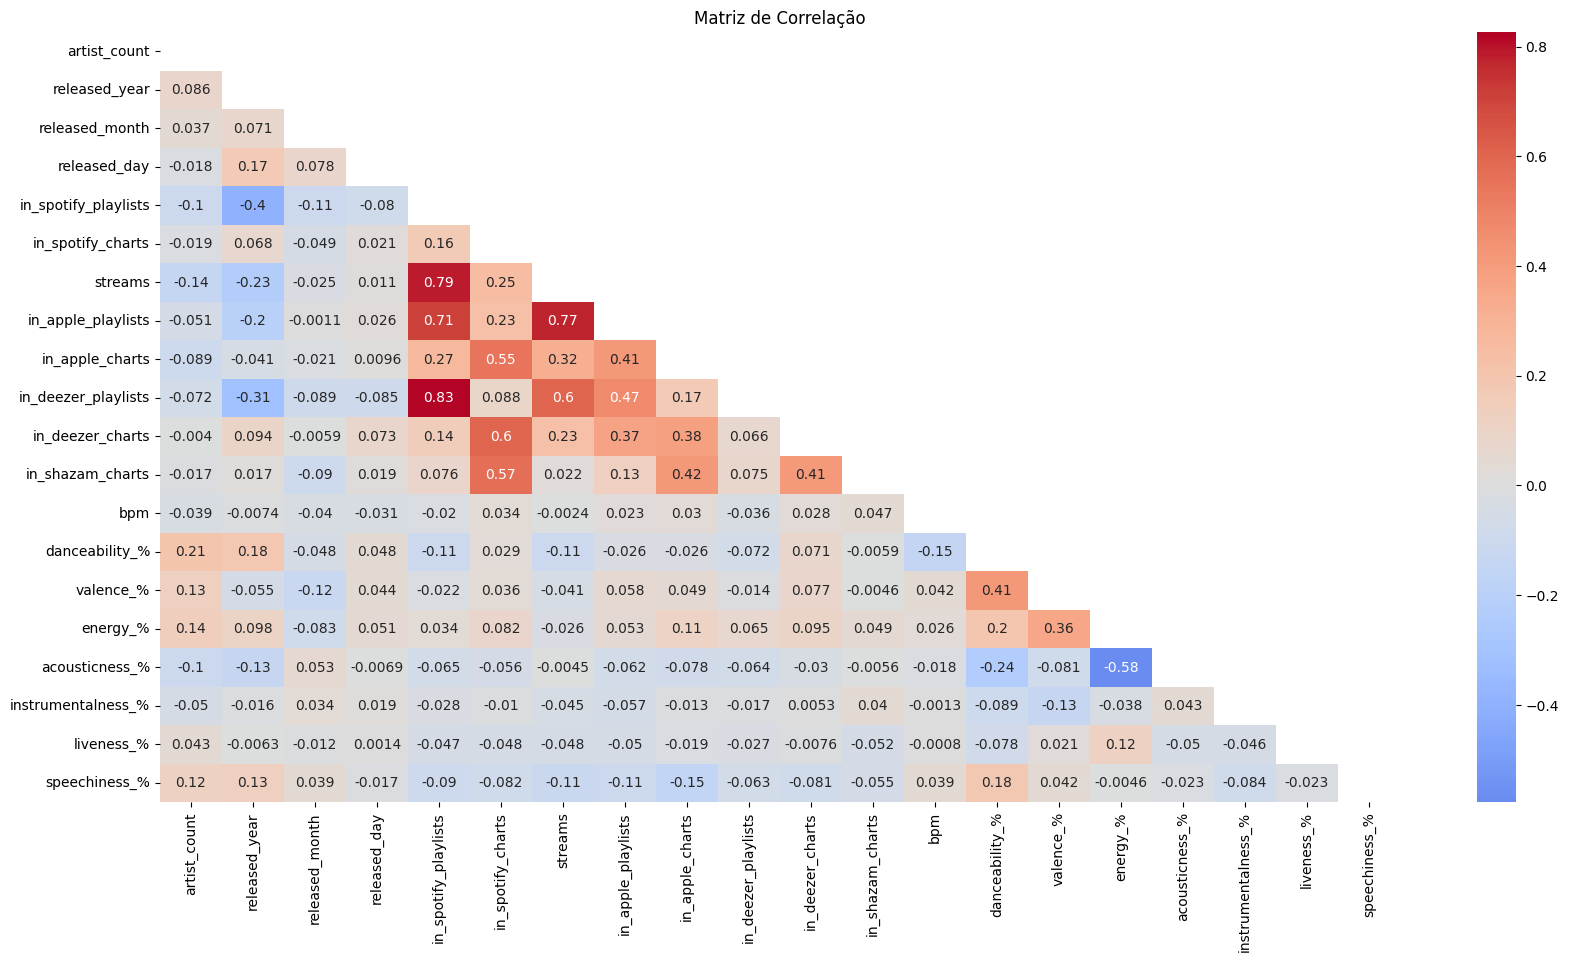

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask = mask)
plt.title('Matriz de Correlação')
plt.show()

###Visualização 5 - Correlação entre Plataformas
Estamos dando um zoom no mapa de correlação anterior para mostrar que os Streams estão altamente correlacionados entre si. Aqui podemos extrair a informação que uma música que vai bem em uma plataforma, vai bem nas outras.


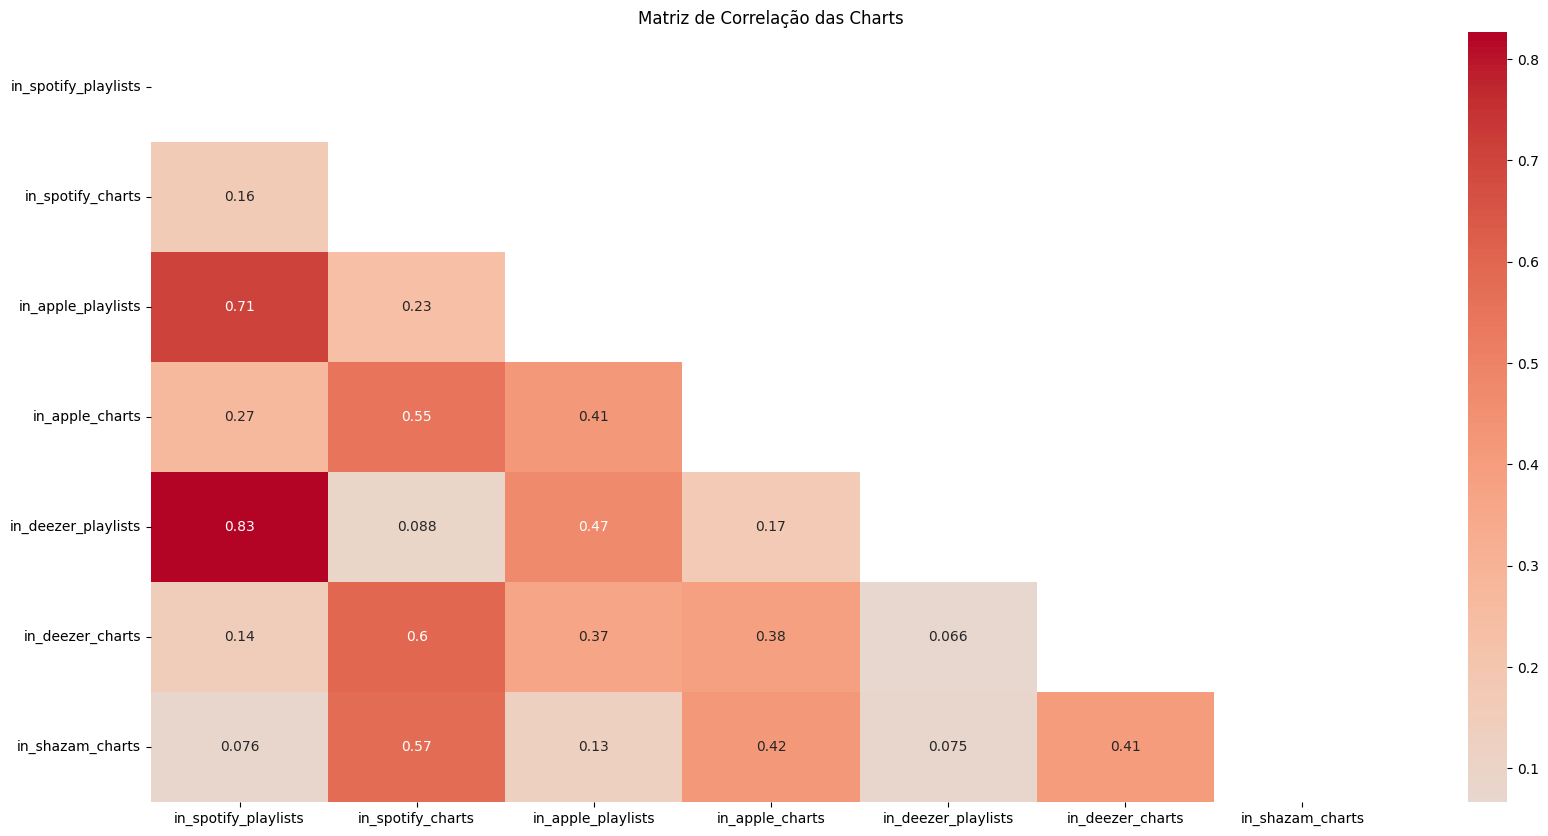

In [24]:
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]
correlation_matrix = df[cross_platform_columns].corr()
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask = mask)
plt.title('Matriz de Correlação das Charts')
plt.show()

###Visualização 6 - Correlação entre Acústica e Energia
Nesse gráfico temos no histograma de cima a distribuição da variável energia, na direita a distribuição da variável Acústica e na interseção deles temos a correlação. Podemos ver claramente uma tendência linear entre as duas, apresentando uma correlação negativa, de modo geral, quanto maior a energia menor é a acústica e vice-versa.

In [25]:
fig = px.scatter(df, x="energy_%", y="acousticness_%", marginal_y="histogram", marginal_x="histogram",
                 color="acousticness_%", title='Correlação entre Acústica e Energia',
                 width=800, height=800)
fig.show()

###Visualização 7 - Número de Reproduções por Tonalidade
Método: Stacked Bar Chart, afim de mostrar qual tonalidade de música é mais ouvida pelo público criamos o gráfico de barras empilhadas fazendo distinção do Modo e Nota. Verificamos que C# Maior possui majoritariamente mais reproduções. A visualização é facilitada em barras por se tratar de categorias, empilhamos para comparar seu Modo e facilitar a comparação.

In [26]:
vis1 = df[['key', 'mode', 'streams']].copy()
vis1 = vis1.groupby(['key', 'mode']).sum().reset_index()

major_mode_df = vis1[vis1['mode'] == 'Major']
minor_mode_df = vis1[vis1['mode'] == 'Minor']

combined_df = pd.concat([major_mode_df, minor_mode_df], ignore_index=True)
combined_df['mode'] = combined_df['mode'].map({'Major': 'Maior', 'Minor': 'Menor'})
fig = px.bar(combined_df, x='streams', y='key', color='mode', labels={'key':'Nota', 'streams':'Reproduções', 'mode':'Modo'})
fig.update_layout(title='Reproduções por Tonalidade',
                  yaxis = {"categoryorder":"total ascending"})
fig.show()